# <font color='#ff0000'>  CLUSTERING:AIRLINES DATA

## <font color='#b30059'> Problem Statement

## <font color='#1a53ff'> Perform clustering (hierarchical,K means clustering and DBSCAN) for the airlines data to obtain optimum number of clusters.
##  <font color='#1a53ff'> Draw the inferences from the clusters obtained.

## <font color='#b30059'> Data Description

The file EastWestAirlinescontains information on passengers who belong to an airline’s frequent flier program. For each passenger the data include information on their mileage history and on different ways they accrued or spent miles in the last year. The goal is to try to identify clusters of passengers that have similar characteristics for the purpose of targeting different segments for different types of mileage offers

ID --Unique ID

Balance--Number of miles eligible for award travel

Qual_mile--Number of miles counted as qualifying for Topflight status

cc1_miles -- Number of miles earned with freq. flyer credit card in the past 12 months:

cc2_miles -- Number of miles earned with Rewards credit card in the past 12 months:

cc3_miles -- Number of miles earned with Small Business credit card in the past 12 months:

1 = under 5,000

2 = 5,000 - 10,000

3 = 10,001 - 25,000

4 = 25,001 - 50,000

5 = over 50,000

Bonus_miles--Number of miles earned from non-flight bonus transactions in the past 12 months

Bonus_trans--Number of non-flight bonus transactions in the past 12 months

Flight_miles_12mo--Number of flight miles in the past 12 months

Flight_trans_12--Number of flight transactions in the past 12 months

Days_since_enrolled--Number of days since enrolled in flier program

Award--whether that person had award flight (free flight) or not

 

In [1]:
### import required libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import power_transform

import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

from sklearn.cluster import KMeans

from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

In [2]:
airlines = pd.read_excel('EastWestAirlines.xlsx',sheet_name='data')
airlines.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [3]:
airlines.shape

(3999, 12)

In [4]:
airlines.columns

Index(['ID#', 'Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award?'],
      dtype='object')

In [5]:
# Dropping the unnecessary columns from the data frame
airlines1 = airlines.drop('ID#', axis=1)

In [6]:
airlines1.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1


In [7]:
airlines1.shape

(3999, 11)

In [8]:
airlines1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Balance            3999 non-null   int64
 1   Qual_miles         3999 non-null   int64
 2   cc1_miles          3999 non-null   int64
 3   cc2_miles          3999 non-null   int64
 4   cc3_miles          3999 non-null   int64
 5   Bonus_miles        3999 non-null   int64
 6   Bonus_trans        3999 non-null   int64
 7   Flight_miles_12mo  3999 non-null   int64
 8   Flight_trans_12    3999 non-null   int64
 9   Days_since_enroll  3999 non-null   int64
 10  Award?             3999 non-null   int64
dtypes: int64(11)
memory usage: 343.8 KB


#### there is no null values and all are integer values

In [9]:
#checking the duplicate values

airlines1[airlines1.duplicated(keep=False)]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
3370,1000,0,1,1,1,0,0,0,0,1597,0
3876,1000,0,1,1,1,0,0,0,0,1597,0


In [10]:
airlines1= airlines1.drop_duplicates()

In [11]:
airlines1.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1


In [12]:
airlines1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3998 entries, 0 to 3998
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Balance            3998 non-null   int64
 1   Qual_miles         3998 non-null   int64
 2   cc1_miles          3998 non-null   int64
 3   cc2_miles          3998 non-null   int64
 4   cc3_miles          3998 non-null   int64
 5   Bonus_miles        3998 non-null   int64
 6   Bonus_trans        3998 non-null   int64
 7   Flight_miles_12mo  3998 non-null   int64
 8   Flight_trans_12    3998 non-null   int64
 9   Days_since_enroll  3998 non-null   int64
 10  Award?             3998 non-null   int64
dtypes: int64(11)
memory usage: 374.8 KB


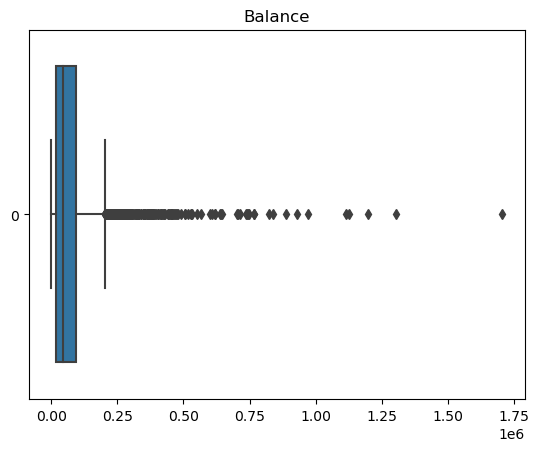

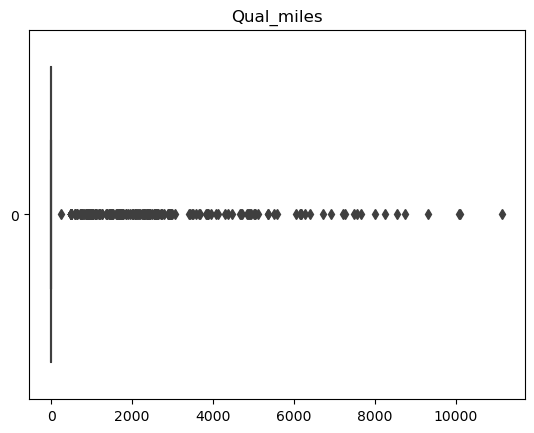

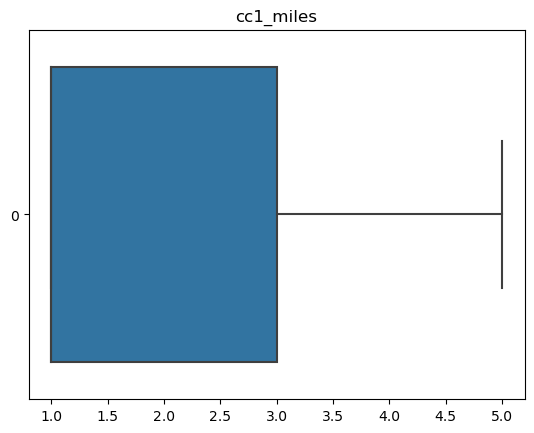

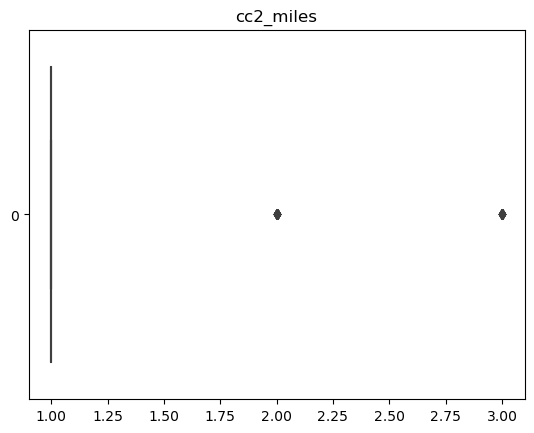

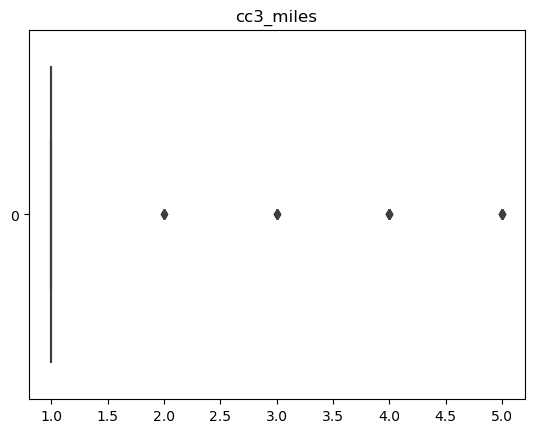

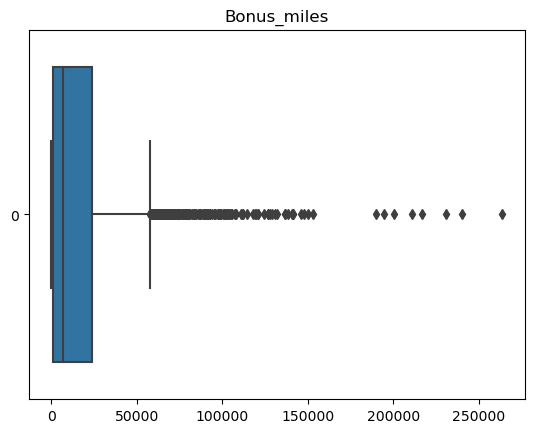

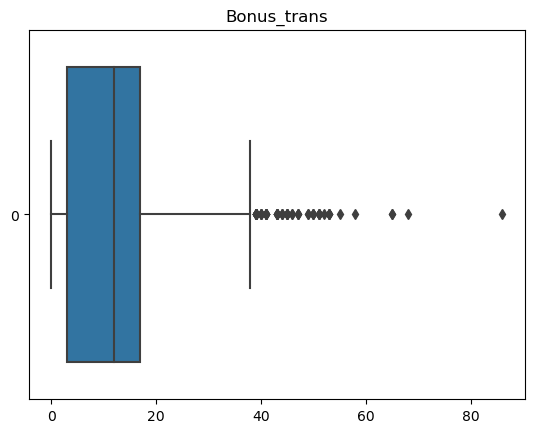

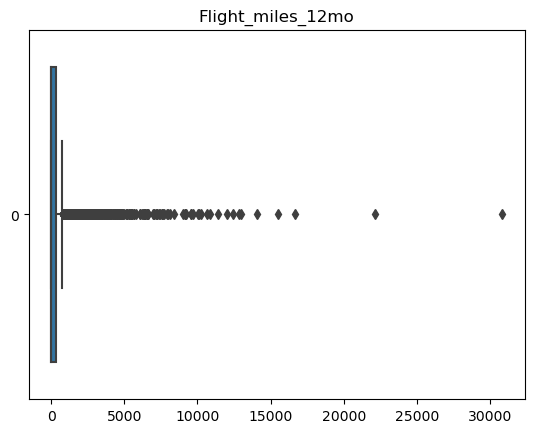

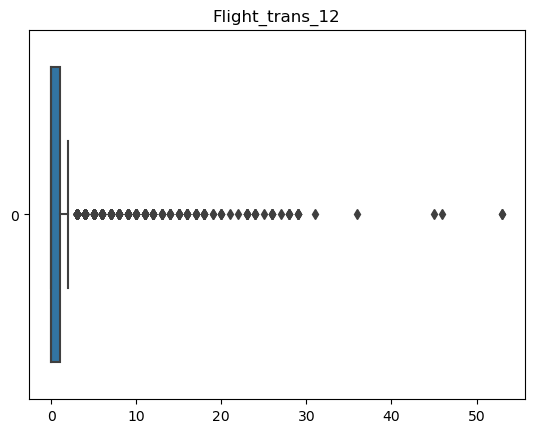

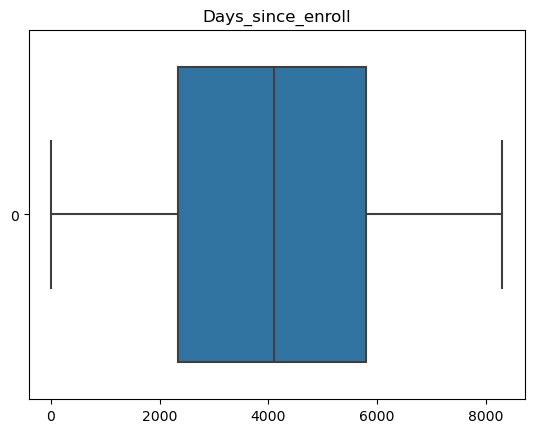

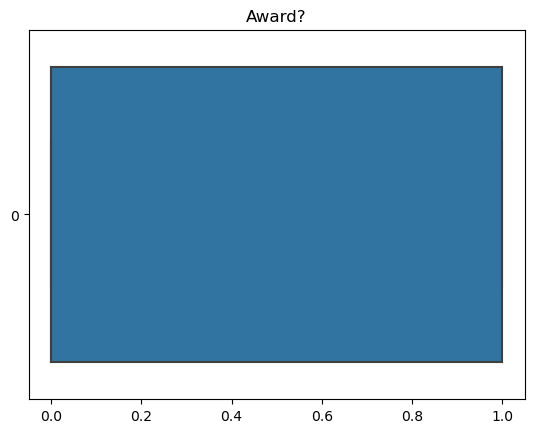

In [13]:
# Iterate over columns and plot boxplots
for column in airlines1.columns:
    plt.figure()  # Create a new figure for each boxplot
    sns.boxplot(data=airlines1[column],orient='h')
    plt.title(column)  # Set the title of the boxplot as the column name
    plt.show()  # Display the boxplot


### Standardisation using power transformation

In [14]:
airlines2 = airlines1.copy()
airlines2_transformed = power_transform(airlines2, method='yeo-johnson')
airlines2_transformed

array([[-0.34741121, -0.24477574, -0.84493143, ..., -0.67508463,
         1.32167124, -0.76707163],
       [-0.63388746, -0.24477574, -0.84493143, ..., -0.67508463,
         1.30876346, -0.76707163],
       [-0.03895759, -0.24477574, -0.84493143, ..., -0.67508463,
         1.33536768, -0.76707163],
       ...,
       [ 0.46020218, -0.24477574,  1.05824508, ..., -0.67508463,
        -1.36569918,  1.30365921],
       [ 0.20061397, -0.24477574, -0.84493143, ...,  1.08067199,
        -1.36633133, -0.76707163],
       [-1.80538742, -0.24477574, -0.84493143, ..., -0.67508463,
        -1.36822853, -0.76707163]])

In [15]:
airlines2=pd.DataFrame(airlines2_transformed,columns=airlines1.columns) 
airlines2

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,-0.347411,-0.244776,-0.844931,-3.469447e-18,-3.469447e-18,-1.179241,-1.330354,-0.683432,-0.675085,1.321671,-0.767072
1,-0.633887,-0.244776,-0.844931,-3.469447e-18,-3.469447e-18,-1.133253,-1.075642,-0.683432,-0.675085,1.308763,-0.767072
2,-0.038958,-0.244776,-0.844931,-3.469447e-18,-3.469447e-18,-0.192576,-0.689469,-0.683432,-0.675085,1.335368,-0.767072
3,-0.822951,-0.244776,-0.844931,-3.469447e-18,-3.469447e-18,-0.925760,-1.330354,-0.683432,-0.675085,1.302303,-0.767072
4,0.723491,-0.244776,1.342966,-3.469447e-18,-3.469447e-18,1.169335,1.329679,1.548815,1.685713,1.295435,1.303659
...,...,...,...,...,...,...,...,...,...,...,...
3993,-0.663558,-0.244776,-0.844931,-3.469447e-18,-3.469447e-18,0.153302,-0.689469,1.346623,1.080672,-1.365067,1.303659
3994,0.340255,-0.244776,-0.844931,-3.469447e-18,-3.469447e-18,-0.728666,-0.531236,-0.683432,-0.675085,-1.370127,1.303659
3995,0.460202,-0.244776,1.058245,-3.469447e-18,-3.469447e-18,0.794855,-0.134776,-0.683432,-0.675085,-1.365699,1.303659
3996,0.200614,-0.244776,-0.844931,-3.469447e-18,-3.469447e-18,-0.925760,-1.330354,1.446163,1.080672,-1.366331,-0.767072


### Checking the normal distribution of the data, after Power transformation

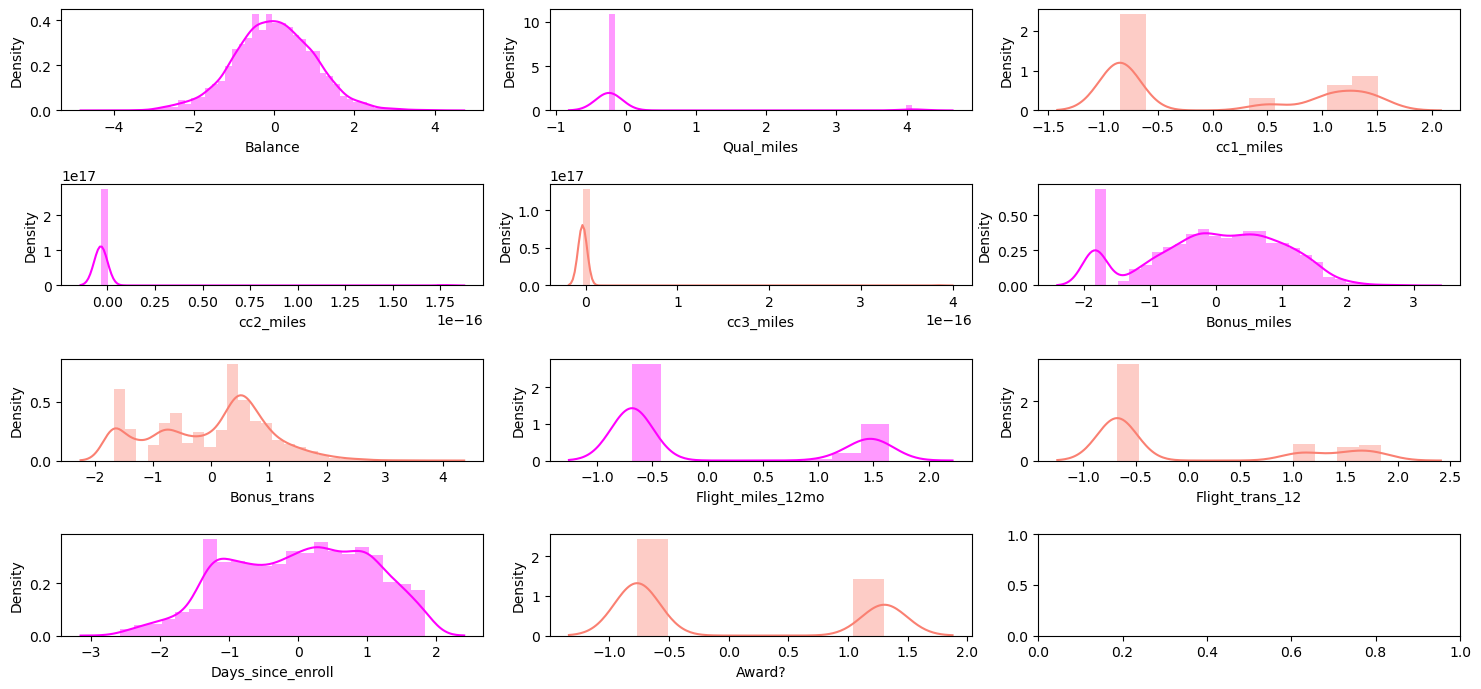

In [16]:
fig, ax = plt.subplots(4, 3, figsize=(15,7))
sns.distplot(airlines2.Balance, ax=ax[0,0],color='magenta')
sns.distplot(airlines2.Qual_miles, ax=ax[0,1],color='magenta')
sns.distplot(airlines2.cc1_miles, ax=ax[0,2],color='salmon')
sns.distplot(airlines2.cc2_miles, ax=ax[1,0],color='magenta')
sns.distplot(airlines2.cc3_miles, ax=ax[1,1],color='salmon')
sns.distplot(airlines2.Bonus_miles, ax=ax[1,2],color='magenta')
sns.distplot(airlines2.Bonus_trans, ax=ax[2,0],color='salmon')
sns.distplot(airlines2.Flight_miles_12mo, ax=ax[2,1],color='magenta')
sns.distplot(airlines2.Flight_trans_12, ax=ax[2,2],color='salmon')
sns.distplot(airlines2.Days_since_enroll, ax=ax[3,0],color='magenta')
sns.distplot(airlines2["Award?"] , ax=ax[3,1],color='salmon')
plt.tight_layout()
plt.show()

## Hierarchical clustering methods

### Average linkage method

Text(0.5, 1.0, 'Dendogram')

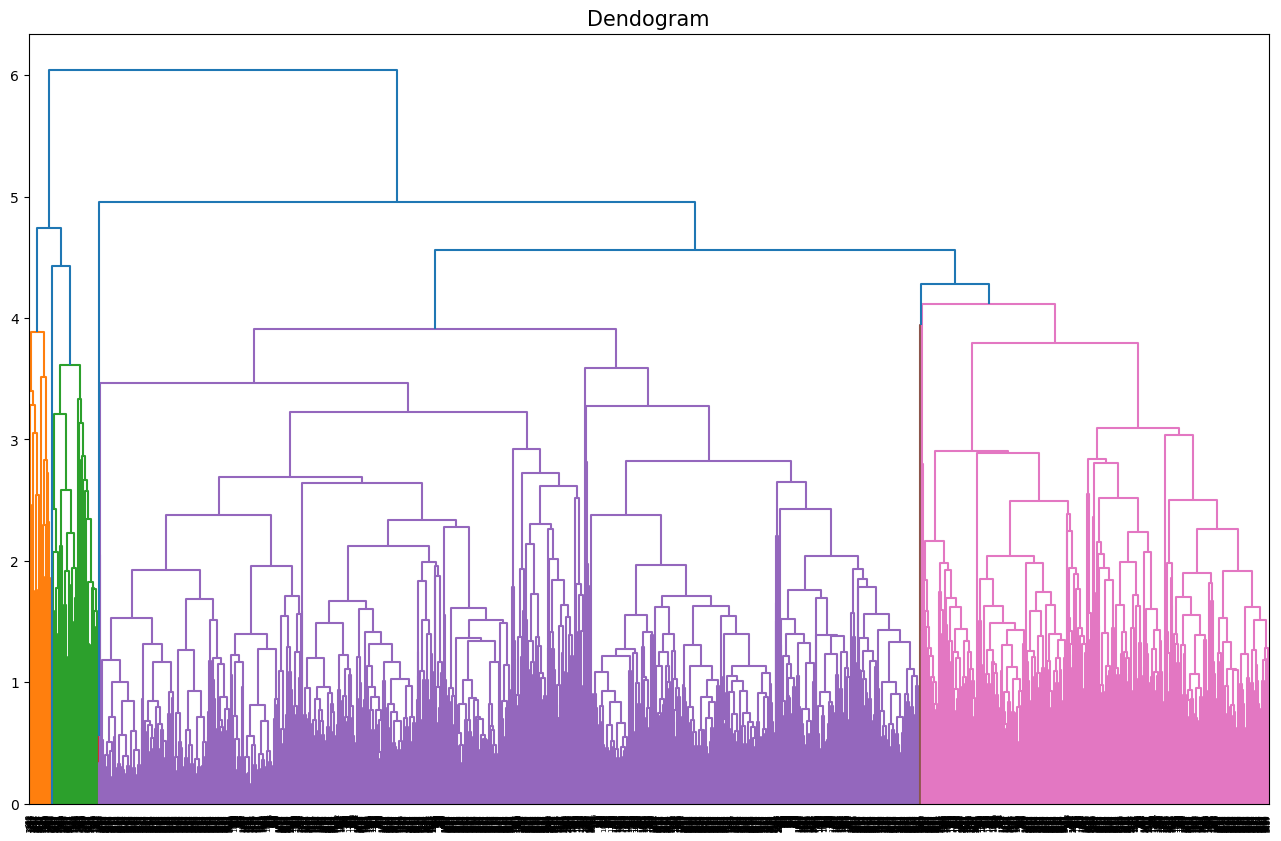

In [17]:
fig=plt.figure(figsize=(16,10))
dendrogram = sch.dendrogram(sch.linkage(airlines2_transformed, method='average'))
plt.title("Dendogram",size=15)

In [18]:
hc1 = AgglomerativeClustering(n_clusters=5, affinity = 'euclidean', linkage = 'average')

### Model fitting

In [19]:
y_hc1 = hc1.fit_predict(airlines2_transformed)
Clusters=pd.DataFrame(y_hc1,columns=['Clusters'])

In [20]:
# Creating a new column
airlines1['cluster'] = y_hc1

In [21]:
airlines1.groupby('cluster').agg(['mean']).reset_index()

,cluster,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,170339.198675,2508.019868,2.278146,1.013245,1.013245,28717.337748,18.344371,2574.390728,7.768212,4478.728477,0.768212
1,1,104075.087266,0.000000,2.290294,1.017809,1.016919,23897.578807,15.159394,1291.878896,3.845058,4368.430098,0.547640
2,2,125.000000,0.000000,1.000000,1.000000,1.000000,125.000000,1.000000,125.000000,1.000000,5163.500000,0.000000
3,3,57973.546667,2634.706667,2.000000,1.000000,1.000000,15002.626667,10.026667,0.000000,0.000000,4111.026667,0.400000
4,4,55679.977711,0.000000,1.952021,1.013600,1.010578,13699.846619,9.765017,0.000000,0.000000,3992.381186,0.272006


### Checking the no.of elements in each cluster

In [22]:
airlines1.columns

Index(['Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award?', 'cluster'],
      dtype='object')

In [23]:
for i in range(5):
    print("cluster", i)
    print("Total Members:", len(list(airlines1[airlines1['cluster'] == i].values)))
    print()

cluster 0
Total Members: 151

cluster 1
Total Members: 1123

cluster 2
Total Members: 2

cluster 3
Total Members: 75

cluster 4
Total Members: 2647



### Centroid(ward) linkage method

Text(0.5, 1.0, 'Dendogram')

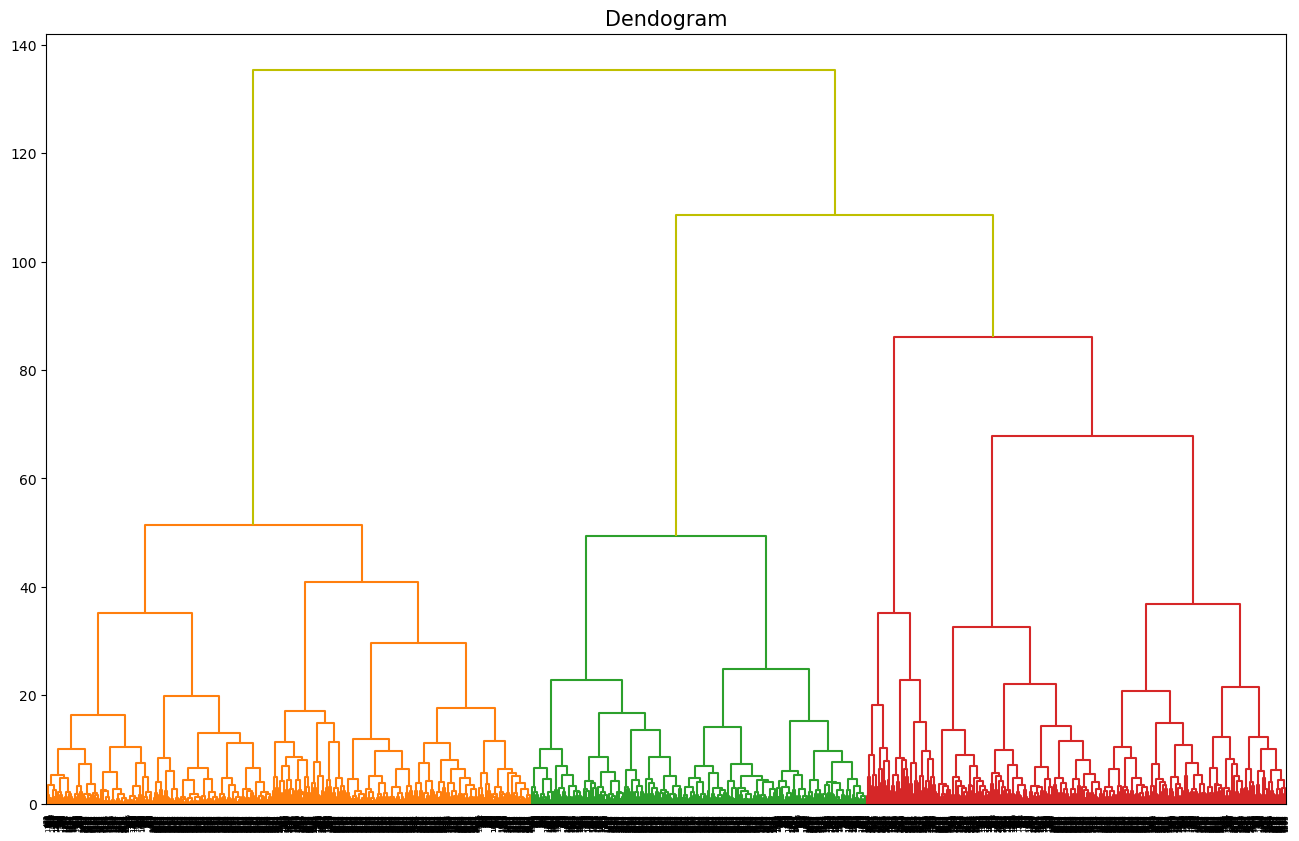

In [24]:
fig=plt.figure(figsize=(16,10))
dendrogram = sch.dendrogram(sch.linkage(airlines2_transformed, method='ward'),above_threshold_color='y')
plt.title("Dendogram",size=15)

In [25]:
# Creating Cluster using centroid linkage method
hc2 = AgglomerativeClustering(n_clusters=5, affinity = 'euclidean', linkage = 'ward')

### Model fitting

In [26]:
y_hc2 = hc2.fit_predict(airlines2_transformed)
Clusters=pd.DataFrame(y_hc2,columns=['Clusters'])

In [27]:
airlines1['cluster'] = y_hc2

In [28]:
airlines1.groupby('cluster').agg(['mean']).reset_index()

,cluster,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,33440.261175,0.000000,1.000000,1.022350,1.005109,2839.505109,5.467433,0.000000,0.000000,3632.566411,0.151980
1,1,77788.952703,0.000000,1.000000,1.030405,1.000000,6038.932432,8.885135,1403.608108,4.155405,3981.564189,0.429054
2,2,87897.735430,0.000000,3.331175,1.000925,1.018501,29432.774283,15.990749,0.000000,0.000000,4513.629972,0.445883
3,3,133049.712389,2550.061947,2.185841,1.008850,1.008850,24165.995575,15.584071,1720.057522,5.190265,4356.703540,0.646018
4,4,132880.887430,0.000000,3.718574,1.003752,1.035647,43643.870544,22.075047,1163.403377,3.489681,4801.103189,0.677298


### Viewing how many categories are included in each cluster

In [29]:
# Checking how many categories are included in each cluster 
for i in range(5):
    print("cluster", i)
    print("Total Members:", len(list(airlines1[airlines1['cluster'] == i].values)))
    print()

cluster 0
Total Members: 1566

cluster 1
Total Members: 592

cluster 2
Total Members: 1081

cluster 3
Total Members: 226

cluster 4
Total Members: 533



### Complete linkage method

Text(0.5, 1.0, 'Dendogram')

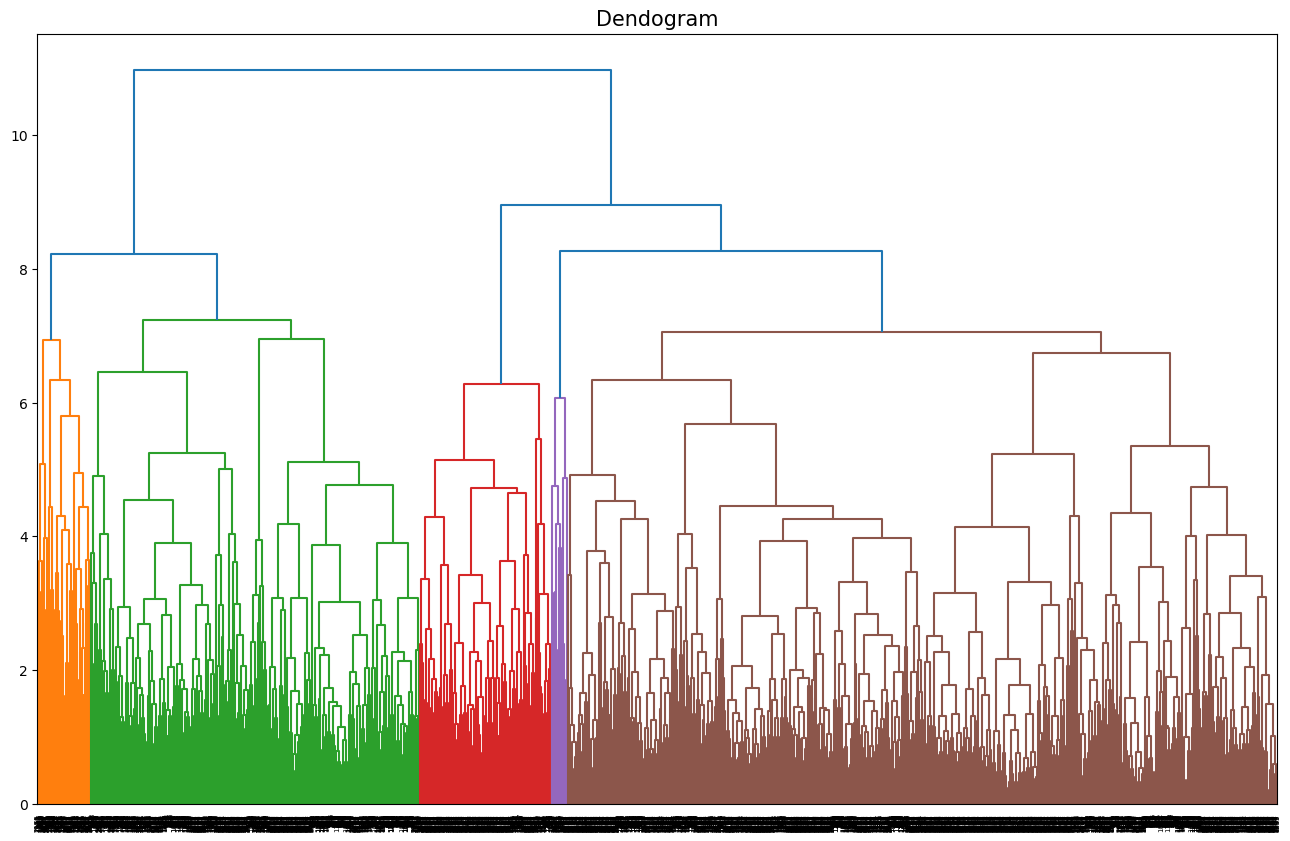

In [30]:
fig=plt.figure(figsize=(16,10))
dendrogram = sch.dendrogram(sch.linkage(airlines2_transformed, method='complete'))
plt.title("Dendogram",size=15)

In [31]:
# Creatig Cluster using complete linkage method
hc3 = AgglomerativeClustering(n_clusters=5, affinity = 'euclidean', linkage = 'complete')

In [32]:
y_hc3 = hc3.fit_predict(airlines2_transformed)
Clusters=pd.DataFrame(y_hc3,columns=['Clusters'])

In [33]:
airlines1['cluster'] = y_hc3
airlines1.groupby('cluster').agg(['mean']).reset_index()

,cluster,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,145838.029218,0.000000,3.541942,1.004713,1.032045,39928.083883,19.713478,809.139491,2.377003,5095.663525,0.553252
1,1,39247.977700,0.000000,1.506340,1.016616,1.005684,7510.160909,7.914298,53.188019,0.161784,3832.701355,0.220813
2,2,46620.754717,0.000000,1.268868,1.030660,1.000000,8399.268868,9.099057,1110.594340,3.367925,3094.386792,0.573113
3,3,46202.320755,2805.528302,1.000000,1.000000,1.000000,2909.528302,3.962264,188.245283,0.566038,3446.471698,0.264151
4,4,159656.138728,2471.797688,2.549133,1.011561,1.011561,30678.092486,19.144509,2189.341040,6.606936,4635.560694,0.763006


### Checking how many categories are included in each cluster

In [34]:
for i in range(5):
    print("cluster", i)
    print("Total Members:", len(list(airlines1[airlines1['cluster'] == i].values)))
    print()

cluster 0
Total Members: 1061

cluster 1
Total Members: 2287

cluster 2
Total Members: 424

cluster 3
Total Members: 53

cluster 4
Total Members: 173



### Single linkage method

Text(0.5, 1.0, 'Dendogram')

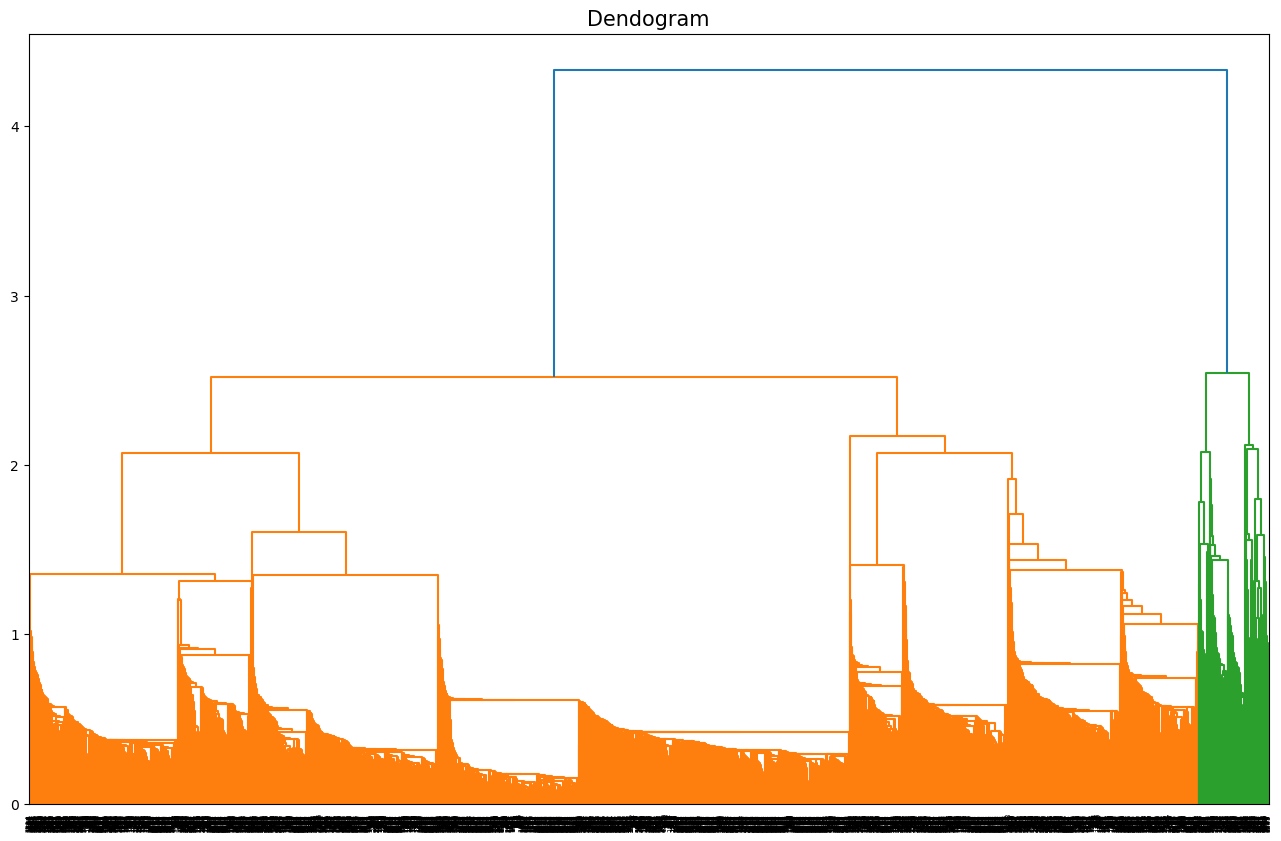

In [35]:
fig=plt.figure(figsize=(16,10))
dendrogram = sch.dendrogram(sch.linkage(airlines2_transformed, method='single'))
plt.title("Dendogram",size=15)

### Creating a Cluster using single linkage method, fitting the data on the model and creating a new cluster column with cluster labels

In [36]:
hc4 = AgglomerativeClustering(n_clusters=5, affinity = 'euclidean', linkage = 'single')
y_hc4 = hc4.fit_predict(airlines2_transformed)
Clusters=pd.DataFrame(y_hc4,columns=['Clusters'])
airlines1['cluster'] = y_hc4
airlines1.groupby('cluster').agg(['mean']).reset_index()

,cluster,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,57973.546667,2634.706667,2.000000,1.000000,1.000000,15002.626667,10.026667,0.000000,0.000000,4111.026667,0.400000
1,1,170339.198675,2508.019868,2.278146,1.013245,1.013245,28717.337748,18.344371,2574.390728,7.768212,4478.728477,0.768212
2,2,0.000000,0.000000,1.000000,1.000000,1.000000,5491.000000,18.000000,2116.000000,5.000000,3204.000000,1.000000
3,3,55679.977711,0.000000,1.952021,1.013600,1.010578,13699.846619,9.765017,0.000000,0.000000,3992.381186,0.272006
4,4,103982.716192,0.000000,2.289146,1.017794,1.016904,23871.654804,15.131673,1289.069395,3.838968,4370.880783,0.546263


In [37]:
# Viewing how many categories are included in each cluster 
for i in range(5):
    print("cluster", i)
    print("Total Members:", len(list(airlines1[airlines1['cluster'] == i].values)))
    print()

cluster 0
Total Members: 75

cluster 1
Total Members: 151

cluster 2
Total Members: 1

cluster 3
Total Members: 2647

cluster 4
Total Members: 1124



## K-means clustering

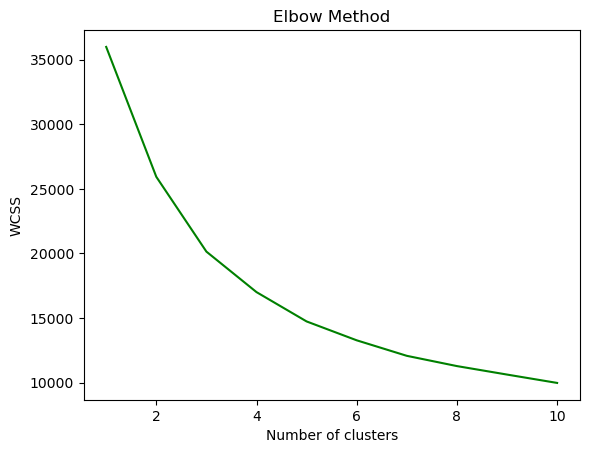

In [38]:
# Plotting elbow curve 
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(airlines2_transformed)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss,color='green')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

### Creating Kmeans with 5 clusters

In [39]:
clusters_new = KMeans(5, random_state=42)
clusters_new.fit(airlines2_transformed)

KMeans(n_clusters=5, random_state=42)

In [40]:
KM_label=clusters_new.labels_
airlines1['cluster'] = clusters_new.labels_
clusters_new.cluster_centers_

array([[-6.75060971e-01, -2.33017024e-01, -8.35751154e-01,
        -1.26482893e-18, -3.46944695e-18, -9.09172689e-01,
        -8.19438300e-01, -6.82207251e-01, -6.73892667e-01,
        -3.10652846e-01, -5.14029165e-01],
       [ 3.71279604e-01, -2.44775743e-01,  9.10227673e-01,
        -2.09226190e-18,  1.55963264e-19,  7.17538974e-01,
         5.92161467e-01, -6.83431729e-01, -6.75084627e-01,
         2.38709401e-01,  1.81354710e-01],
       [ 1.54566080e-02, -2.44775743e-01, -8.19408935e-01,
        -6.05488124e-21, -3.46944695e-18, -2.79741901e-01,
        -2.72792292e-01,  1.45145141e+00,  1.43558484e+00,
        -9.55886109e-02,  7.13394614e-02],
       [ 7.54284474e-01, -2.44775743e-01,  1.11351640e+00,
        -2.15974647e-18,  7.61893069e-19,  1.03656893e+00,
         1.04589723e+00,  1.45618785e+00,  1.41023798e+00,
         3.57999438e-01,  6.72293003e-01],
       [ 5.95309801e-01,  4.08537213e+00,  6.25081446e-02,
        -2.65678370e-18, -1.71909534e-18,  3.71061042e-01,
  

In [41]:
A=airlines1.iloc[:,:].groupby('cluster').agg(['mean']).reset_index()

In [42]:
A

,cluster,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,28528.925322,8.279022,1.006789,1.015614,1.000000,2230.093007,4.682281,0.033944,0.000679,3502.894773,0.122200
1,1,89382.907549,0.000000,3.128923,1.011026,1.023749,27971.685327,16.074640,0.000000,0.000000,4593.606446,0.458015
2,2,69243.130890,0.000000,1.020942,1.026178,1.000000,5429.420593,8.059337,1211.178010,3.598604,3907.469459,0.404887
3,3,140109.272232,0.000000,3.607985,1.009074,1.034483,43060.114338,22.517241,1373.820327,4.096189,4849.402904,0.695100
4,4,135354.193694,2541.076577,2.207207,1.009009,1.009009,24601.418919,15.864865,1751.049550,5.283784,4422.950450,0.657658


In [43]:
# Viewing  number of categories in each cluster
for i in range(5):
    print("cluster", i)
    print("Total Members:", len(list(airlines1[airlines1['cluster'] == i].values)))
    print()

cluster 0
Total Members: 1473

cluster 1
Total Members: 1179

cluster 2
Total Members: 573

cluster 3
Total Members: 551

cluster 4
Total Members: 222



## DBSCAN

In [44]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.8, min_samples=6)
dbscan.fit(airlines2)

DBSCAN(eps=0.8, min_samples=6)

In [45]:
dbscan.labels_

array([0, 0, 0, ..., 4, 6, 0], dtype=int64)

In [46]:
cl=pd.DataFrame(dbscan.labels_,columns=['cluster_db'])

In [47]:
cl

,cluster_db
0,0
1,0
2,0
3,0
4,1
...,...
3993,3
3994,5
3995,4
3996,6


In [48]:
airlines3 = pd.concat([airlines2,cl],axis=1)

In [49]:
airlines3

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster_db
0,-0.347411,-0.244776,-0.844931,-3.469447e-18,-3.469447e-18,-1.179241,-1.330354,-0.683432,-0.675085,1.321671,-0.767072,0
1,-0.633887,-0.244776,-0.844931,-3.469447e-18,-3.469447e-18,-1.133253,-1.075642,-0.683432,-0.675085,1.308763,-0.767072,0
2,-0.038958,-0.244776,-0.844931,-3.469447e-18,-3.469447e-18,-0.192576,-0.689469,-0.683432,-0.675085,1.335368,-0.767072,0
3,-0.822951,-0.244776,-0.844931,-3.469447e-18,-3.469447e-18,-0.925760,-1.330354,-0.683432,-0.675085,1.302303,-0.767072,0
4,0.723491,-0.244776,1.342966,-3.469447e-18,-3.469447e-18,1.169335,1.329679,1.548815,1.685713,1.295435,1.303659,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3993,-0.663558,-0.244776,-0.844931,-3.469447e-18,-3.469447e-18,0.153302,-0.689469,1.346623,1.080672,-1.365067,1.303659,3
3994,0.340255,-0.244776,-0.844931,-3.469447e-18,-3.469447e-18,-0.728666,-0.531236,-0.683432,-0.675085,-1.370127,1.303659,5
3995,0.460202,-0.244776,1.058245,-3.469447e-18,-3.469447e-18,0.794855,-0.134776,-0.683432,-0.675085,-1.365699,1.303659,4
3996,0.200614,-0.244776,-0.844931,-3.469447e-18,-3.469447e-18,-0.925760,-1.330354,1.446163,1.080672,-1.366331,-0.767072,6


In [50]:
airlines3.isnull().sum()

Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
cluster_db           0
dtype: int64

In [51]:
airlines3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Balance            3998 non-null   float64
 1   Qual_miles         3998 non-null   float64
 2   cc1_miles          3998 non-null   float64
 3   cc2_miles          3998 non-null   float64
 4   cc3_miles          3998 non-null   float64
 5   Bonus_miles        3998 non-null   float64
 6   Bonus_trans        3998 non-null   float64
 7   Flight_miles_12mo  3998 non-null   float64
 8   Flight_trans_12    3998 non-null   float64
 9   Days_since_enroll  3998 non-null   float64
 10  Award?             3998 non-null   float64
 11  cluster_db         3998 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 374.9 KB


In [52]:
airlines1

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster
0,28143,0,1,1,1,174,1,0,0,7000,0,0
1,19244,0,1,1,1,215,2,0,0,6968,0,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,14776,0,1,1,1,500,1,0,0,6952,0,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,2
3995,64385,0,1,1,1,981,5,0,0,1395,1,0
3996,73597,0,3,1,1,25447,8,0,0,1402,1,1
3997,54899,0,1,1,1,500,1,500,1,1401,0,2


### Silhouette score

In [53]:
s1=(metrics.silhouette_score(airlines2_transformed,y_hc1))
s1

0.24528722534996955

In [54]:
s2=(metrics.silhouette_score(airlines2_transformed,y_hc2))
s2

0.3239757195125234

In [55]:
s3=(metrics.silhouette_score(airlines2_transformed,y_hc3))
s3

0.19982199632511105

In [56]:
s4=(metrics.silhouette_score(airlines2_transformed,y_hc4))
s4

0.29715221403443104

In [57]:
s5=(metrics.silhouette_score(airlines2_transformed,clusters_new.labels_))
s5

0.3251051171827142

In [58]:
s6=(metrics.silhouette_score(airlines2_transformed,airlines3.cluster_db))
s6

0.2338945347527742

### Tabling using the models

In [59]:
t={'Model':['Average','Centrod','Complete','Single','Kmeans','DBScan'],
  'Sillhouette score':[s1,s2,s3,s4,s5,s6]
  }
t=pd.DataFrame(t)
t

,Model,Sillhouette score
0,Average,0.245287
1,Centrod,0.323976
2,Complete,0.199822
3,Single,0.297152
4,Kmeans,0.325105
5,DBScan,0.233895


## Conclusion :

### Based on the silhoutte score it is evident that centroid linkage method and kmeans clustering gives the high value.Hierarchical cluster is way more complex to understand, in which centroid linkage gives a better result its silhouette score is similar to kmeans clustering. In heirarchical clustering, the other linkage methods have a biased clustering, showing that 70% data is belongs to only one cluster. So we predict the result only with kmeans clustering.Using 5 clusters give better result .